Import libraries to be used in the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="whitegrid", palette="colorblind")

Load data into a dataframe and look at the data structure.

In [2]:
path = "/workspaces/Data-Science-Projects/EDA/Warehouse/data/warehouse_messy_data.csv"
df = pd.read_csv(path)

df.shape

(1000, 10)

In [3]:
df.head()

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
0,1102,gadget y,ELECTRONICS,Warehouse 2,Aisle 1,300,9.99,Supplier C,In Stock,NaN
1,1435,gadget y,ELECTRONICS,Warehouse 2,Aisle 4,two hundred,19.99,Supplier C,Out of Stock,NaN
2,1860,widget a,CLOTHING,Warehouse 2,Aisle 3,100,19.99,Supplier B,In Stock,20/12/2022
3,1270,gadget z,TOYS,Warehouse 2,Aisle 4,50,49.99,Supplier B,In Stock,20/12/2022
4,1106,widget a,FURNITURE,Warehouse 3,Aisle 3,two hundred,9.99,Supplier D,Out of Stock,25/04/2023


In [4]:
df.tail()

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
995,1009,widget b,FURNITURE,Warehouse 2,Aisle 2,100,NaN,Supplier C,In Stock,15/01/2023
996,1823,gadget y,ELECTRONICS,Warehouse 2,Aisle 3,300,19.99,Supplier B,In Stock,20/12/2022
997,1797,gadget z,TOYS,Warehouse 3,Aisle 5,150,9.99,Supplier C,Low Stock,05/03/2023
998,1241,widget c,FURNITURE,Warehouse 2,Aisle 2,100,49.99,Supplier C,Low Stock,20/12/2022
999,1250,widget a,CLOTHING,Warehouse 1,Aisle 3,100,49.99,Supplier B,Out of Stock,20/12/2022


From the above outputs, we can see that the dataframe we'll be working with is 10 columns wide and 1,000 records deep. We can also make out that a few of the records either have inconsistent or missing data. 

In [5]:
df.dtypes

Product ID          int64
Product Name       object
Category           object
Warehouse          object
Location           object
Quantity           object
Price             float64
Supplier           object
Status             object
Last Restocked     object
dtype: object

In [6]:
df = df.drop(["Product Name"], axis=1)
df.columns

Index(['Product ID', 'Category', 'Warehouse', 'Location', 'Quantity', 'Price',
       'Supplier', 'Status', 'Last Restocked'],
      dtype='object')

In [7]:
df = df.rename(columns={"Product ID": "ID", "Last Restocked": "Restocked"})
df.columns

Index(['ID', 'Category', 'Warehouse', 'Location', 'Quantity', 'Price',
       'Supplier', 'Status', 'Restocked'],
      dtype='object')

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.count()

ID           1000
Category     1000
Warehouse    1000
Location     1000
Quantity      842
Price         793
Supplier     1000
Status       1000
Restocked     800
dtype: int64

In [10]:
df.dtypes

ID             int64
Category      object
Warehouse     object
Location      object
Quantity      object
Price        float64
Supplier      object
Status        object
Restocked     object
dtype: object

In [12]:
df.head()

,ID,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Restocked
0,1102,ELECTRONICS,Warehouse 2,Aisle 1,300,9.99,Supplier C,In Stock,NaN
1,1435,ELECTRONICS,Warehouse 2,Aisle 4,two hundred,19.99,Supplier C,Out of Stock,NaN
2,1860,CLOTHING,Warehouse 2,Aisle 3,100,19.99,Supplier B,In Stock,20/12/2022
3,1270,TOYS,Warehouse 2,Aisle 4,50,49.99,Supplier B,In Stock,20/12/2022
4,1106,FURNITURE,Warehouse 3,Aisle 3,two hundred,9.99,Supplier D,Out of Stock,25/04/2023


In [15]:
from word2number import w2n

def convert_to_digits(value):
    if pd.isna(value):
        return value
    
    str_value = str(value).strip().lower()
    
    try:
        return float(str_value)
    except ValueError:
        try:
            return w2n.word_to_num(str_value)
        except ValueError:
            return pd.NA

df.Quantity = df["Quantity"].apply(convert_to_digits)
df.dtypes

ID             int64
Category      object
Warehouse     object
Location      object
Quantity     float64
Price        float64
Supplier      object
Status        object
Restocked     object
dtype: object

In [14]:
category_quantity_ave = df.groupby("Category")["Quantity"].mean()
df.Quantity = df.Quantity.fillna(df["Category"].map(category_quantity_ave))

category_price_ave = df.groupby("Category")["Price"].mean()
df.Price = df.Price.fillna(df["Category"].map(category_price_ave))

df.count()

ID           1000
Category     1000
Warehouse    1000
Location     1000
Quantity     1000
Price        1000
Supplier     1000
Status       1000
Restocked     800
dtype: int64

In [18]:
df.Restocked = pd.to_datetime(df.Restocked, errors="coerce")
df.head(10)

,ID,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Restocked
0,1102,ELECTRONICS,Warehouse 2,Aisle 1,300.0,9.99000,Supplier C,In Stock,NaT
1,1435,ELECTRONICS,Warehouse 2,Aisle 4,200.0,19.99000,Supplier C,Out of Stock,NaT
2,1860,CLOTHING,Warehouse 2,Aisle 3,100.0,19.99000,Supplier B,In Stock,2022-12-20
3,1270,TOYS,Warehouse 2,Aisle 4,50.0,49.99000,Supplier B,In Stock,2022-12-20
4,1106,FURNITURE,Warehouse 3,Aisle 3,200.0,9.99000,Supplier D,Out of Stock,2023-04-25
5,1071,CLOTHING,Warehouse 3,Aisle 5,300.0,27.97995,Supplier A,In Stock,2022-12-20
6,1700,CLOTHING,Warehouse 2,Aisle 2,200.0,49.99000,Supplier B,In Stock,2022-12-20
7,1020,CLOTHING,Warehouse 1,Aisle 5,200.0,9.99000,Supplier D,Out of Stock,2022-12-20
8,1614,ELECTRONICS,Warehouse 3,Aisle 3,300.0,9.99000,Supplier B,Out of Stock,2023-03-05
9,1121,TOYS,Warehouse 1,Aisle 2,50.0,19.99000,Supplier C,Out of Stock,2022-12-20


In [22]:
median_date = df.Restocked.median()
df.Restocked = df.Restocked.fillna(median_date)
df.Restocked.count()

np.int64(1000)

outliers

<Axes: xlabel='Price'>

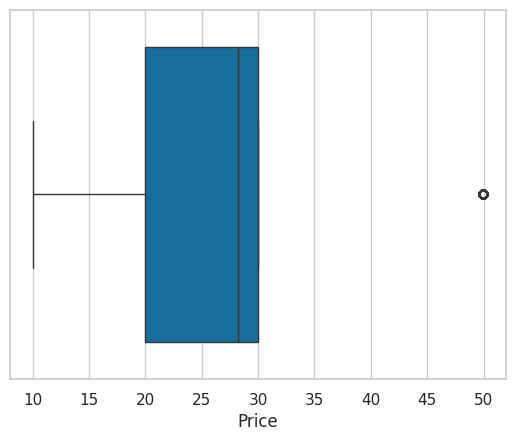

In [23]:
sns.boxplot(x=df.Price)

<Axes: xlabel='Quantity'>

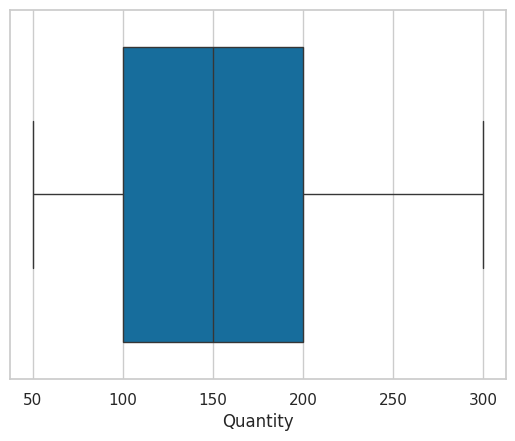

In [25]:
sns.boxplot(x=df.Quantity)

In [33]:
df.describe(exclude=["int64", "datetime64[ns]", "object"])

,Quantity,Price
count,1000.000000,1000.000000
mean,161.422848,28.069042
std,79.851176,13.080031
min,50.000000,9.990000
25%,100.000000,19.990000
50%,150.000000,28.192765
75%,200.000000,29.990000
max,300.000000,49.990000


In [37]:
df.columns

Index(['ID', 'Category', 'Warehouse', 'Location', 'Quantity', 'Price',
       'Supplier', 'Status', 'Restocked'],
      dtype='object')